### Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks 논문리뷰
투빅스 14기 한유진

#### ABSTRACT
computer vision쪽에서 CNN을 이용한 지도학습이 많이 사용되어왔지만 CNN을 이용한 비지도학습은 그렇지 못하였다. 이 논문에서는 지도학습과 비지도학습의 갭차이를 줄이기 위해서 DCGAN이라는 것을 소개한다. 

#### 1. INTRODUCTION
* 좋은 이미지 표현을 구축하는 방법은 GAN을 훈련시키고 feature extractors for supervised tasks로서 generator와 discriminator 네트워크의 일부분을 재사용하는 것이다. 
* contribution 1 : DCGAN이 대부분의 세팅에서 stable하게 하는지 평가
* contribution 2 : 이미지분류를 위해 train되었던 discrimitors를 사용
* contribution 3 : GAN으로 학습된 filter들을 시각화, 특정 object를 그리도록 학습된 특정filter를 보여줄것
* contribution 4 : generator가 vector arithmetic properties가있어 많은 의미의 샘플생성이 가능함을 보여줄것

#### 2. RELATED WORK
##### 2.1 REPRESENTATION LEARNING FROM UNLABELED DATA
* 비지도 학습은 일반적인 computer vision research와 context of images에서 잘 연구된 문제이다.
* clustering on the data (for example using K-means)
* to train auto-encoders
* ladder structures

##### 2.2 GENERATING NATURAL IMAGES
* 이미지 생성모델은 Parametric and Non-Parametric로 분류된다
* Non-Parametric : 기존이미지 데이터베이스에서 일치, 종종 이미지패치와도 일치(texture synthesis, super-resolution, in-painting 에서 사용됨)
* Parametric : 이미지 생성을 위한 Parametric 모델이 광범위하게 탐색됨. 하지만 자연스러운 이미지 생성은 아직까지 성공하지못했다. 

##### 2.3 VISUALIZING THE INTERNALS OF CNNS
* CNN -> black-box method -> deconvolutions과  filtering the maximal activations을 사용함으로써 네트워크에서 각 컨볼 루션 필터의 대략적인 목적을 찾을 수 있음을 보여주었다.

#### 3. APPROACH AND MODEL ARCHITECTURE
* 논문의 접근 방식의 핵심은 CNN architectures에 대해 최근에 입증된 세 가지 변경 사항을 채택하고 수정하는 것이다. <br>
1.pooling layers -> strided convolutions(discriminator, downsampling) and fractional-strided convolutions(generator,upsamplimg)로 대체 <br>
2.convolutional features위에 fully connected layers를 제거(global average pooling발견-> 안정성증가 but 수렴속도 저하시킴)<br>
3.Batch Normalization : 각 단위에 대한 입력을 평균과 단위 분산이 0이되도록 정규화하여 학습을 안정화(모든층에 사용하면 문제가 발생하여 generator output layer와 discriminator input layer에는 적용하지 않음)<br>
4.Generator for all layers -> ReLu사용(output은 Tanh사용), Discriminatorfor all layers -> LeakyReLU사용

#### 4. DETAILS OF ADVERSARIAL TRAINING
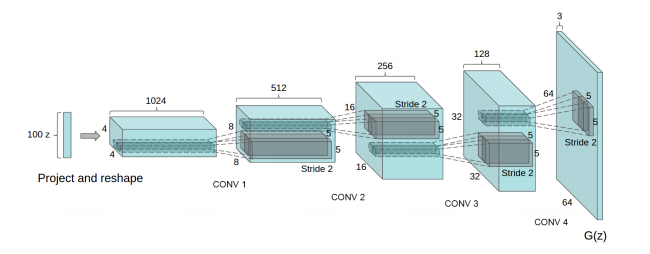
* 100 dimensional uniform distribution(Z)은 4개의 fractionally-strided convolution layer를 지나면서 더 높은 차원의 64x64 pixel 이미지가 된다.(fully connected or pooling layers는 사용되지않음)
* 모든 모델은 mini-batch stochastic gradient descent (SGD) with a mini-batch size of 128로 train되었다
* All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.
* Adam optimizer의 lr = 0.0002, momentum = 0.5로 지정

* LSUN dataset이용 -> DEDUPLICATION사용

#### 5. EMPIRICAL VALIDATION OF DCGANS CAPABILITIES
##### 5.1 CLASSIFYING CIFAR-10 USING GANS AS A FEATURE EXTRACTOR
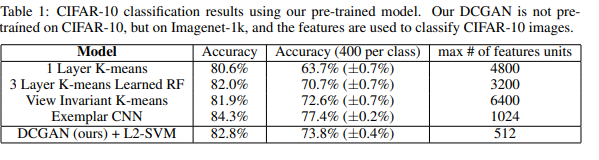
* pre-trained 모델을 사용한 CIFAR-10 분류 결과 :DCGAN은 CIFAR-10이 아니라 Imagenet-1k에 대해 pre-trained, features는  CIFAR-10 이미지를 분류하는 데 사용되었다

#####  5.2 CLASSIFYING SVHN DIGITS USING GANS AS A FEATURE EXTRACTOR
* Additionally, we validate that the CNN architecture used in DCGAN is not the key contributing factor of the model’s performance by training a purely supervised CNN with the same architecture on the same data and optimizing this model via random search over 64 hyperparameter trials (Bergstra & Bengio, 2012).

#### 6. INVESTIGATING AND VISUALIZING THE INTERNALS OF THE NETWORKS
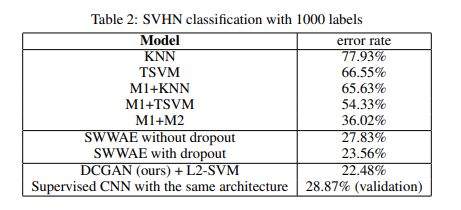
* DCGAN (ours) + L2-SVM의 error rate가 가장 낮은것을 확인할수있다.

#####  6.1 WALKING IN THE LATENT SPACE
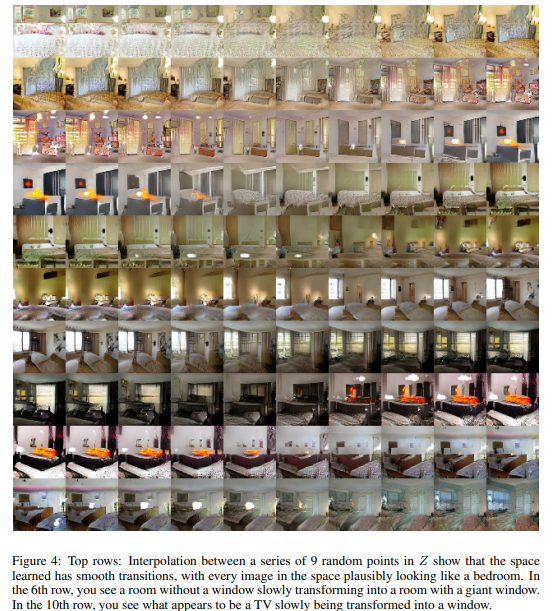
* if there are sharp transitions -> memorization라고 생각
* If walking in this latent space results in semantic changes to the image generations (such as objects being added and removed) -> 모델이 관련성 있고 흥미로운 표현을 학습했다고 추론 할 수 있다.

#####  6.2 VISUALIZING THE DISCRIMINATOR FEATURES
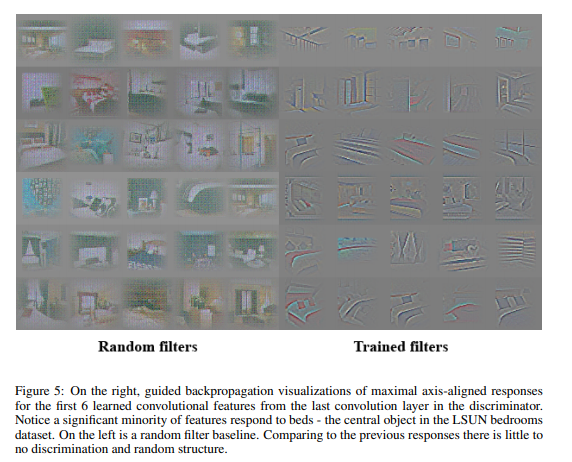
* We demonstrate that an unsupervised DCGAN trained on a large image dataset can also learn a hierarchy of features that are interesting. Using guided backpropagation as proposed by (Springenberg et al., 2014), we show in Fig.5 that the features learnt by the discriminator activate on typical parts of a bedroom, like beds and windows.

#####  6.3 MANIPULATING THE GENERATOR REPRESENTATION
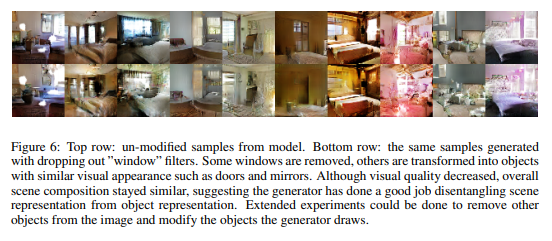
* 학습된 단어 표현을 평가하는 맥락에서 간단한 산술 연산이 표현 공간에서 풍부한 선형 구조를 나타냄을 입증했다.
* ex) vector(”King”) - vector(”Man”) + vector(”Woman”) = vector(”Queen”)

####  CONCLUSION AND FUTURE WORK
* GAN을 훈련하기위한 보다 안정적인 아키텍처 세트를 제안 & adversarial networks learn good representations of images for supervised learning and generative modeling.
* 하지만 아직 불안정성이 남아있다 -> 모델을 오래 학습시키면 collapse a subset of filters to a single oscillation mode와 같은 문제가 발생할 수있다. 